<a href="https://colab.research.google.com/github/Praneet9/Generating_Handwritten_Digits/blob/master/GANS_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, LeakyReLU, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from IPython.display import Image
import numpy as np
from numpy.random import rand
from numpy.random import randint

Using TensorFlow backend.


In [2]:
(train_X, train_y), (test_X, test_y) = load_data()

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


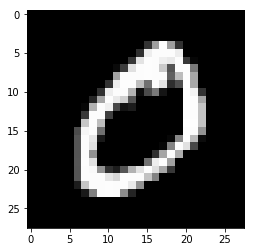

In [3]:
plt.imshow(train_X[1], cmap='gray')

In [0]:
def define_discriminator(in_shape=(28, 28, 1)):
  model = Sequential()
  model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
            
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [5]:
model = define_discriminator()
model.summary()

W0629 17:58:09.049330 140122990327680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0629 17:58:09.069411 140122990327680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0629 17:58:09.075767 140122990327680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0629 17:58:09.094690 140122990327680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0629 17:58:09.104499 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [0]:
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

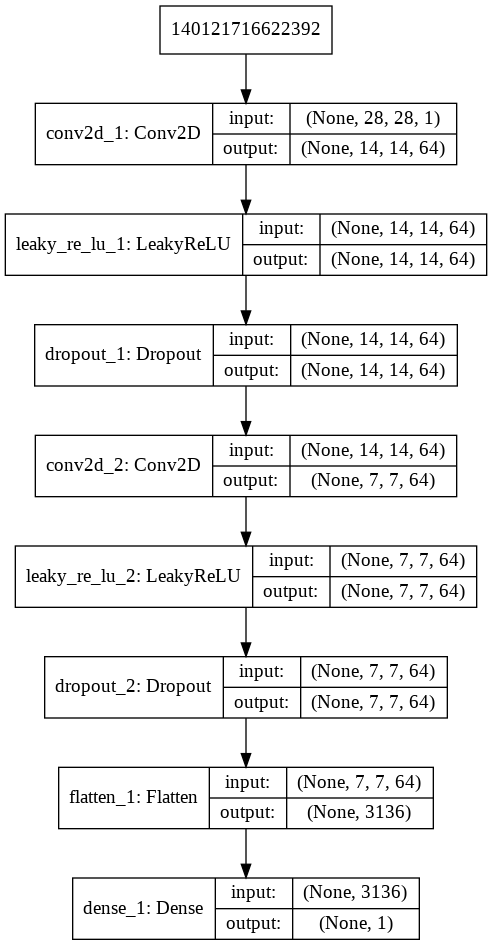

In [7]:
Image('discriminator_plot.png')

In [0]:
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = np.expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

In [0]:
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, 1))
	return X, y

In [0]:
def generate_fake_samples(n_samples):
  # generate uniform random numbers in [0,1]
  X = rand(28*28*n_samples)
  # reshape into a batch of grayscale images
  X = X.reshape((n_samples, 28, 28, 1))
  # generate 'fake' class labels (0)
  y = np.zeros((n_samples, 1))
  return X, y

In [0]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
  half_batch = int(n_batch/2)
  # manually enumerate epochs
  for i in range(n_iter):
    # get randomly selected real samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    # generate fake samples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    # summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [0]:
dataset = load_real_samples()

In [0]:
train_discriminator(model, dataset)